In [171]:
#import necessory libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
%matplotlib inline


In [172]:
#load_datase
data=pd.read_csv("/content/indian_liver_patient.csv")

In [173]:
# print data
data.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [174]:
#shape of  a dataset
data.shape

(583, 11)

In [175]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [177]:
data["Dataset"].unique()

array([1, 2])

<Axes: xlabel='Dataset', ylabel='count'>

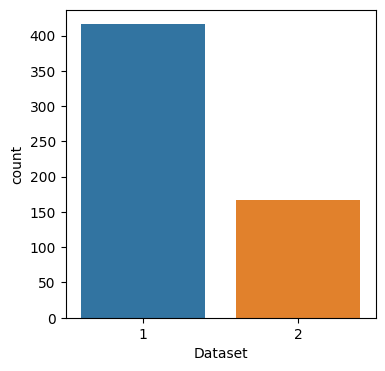

In [178]:
plt.figure(figsize=(4,4))
sns.countplot(x="Dataset",data=data)

In [179]:

liver_disease,not_liver_disease=data['Dataset'].value_counts()
print("liver disease patinets:",LD)
print("Non-liver disease patinets:",NLD)

liver disease patinets: 416
Non-liver disease patinets: 167


In [180]:
#filling null values with median
data['Albumin_and_Globulin_Ratio'] = data["Albumin_and_Globulin_Ratio"].fillna(data['Albumin_and_Globulin_Ratio'].median())

In [181]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

Text(0.5, 0, 'Albumin_and_Globulin_Ratio')

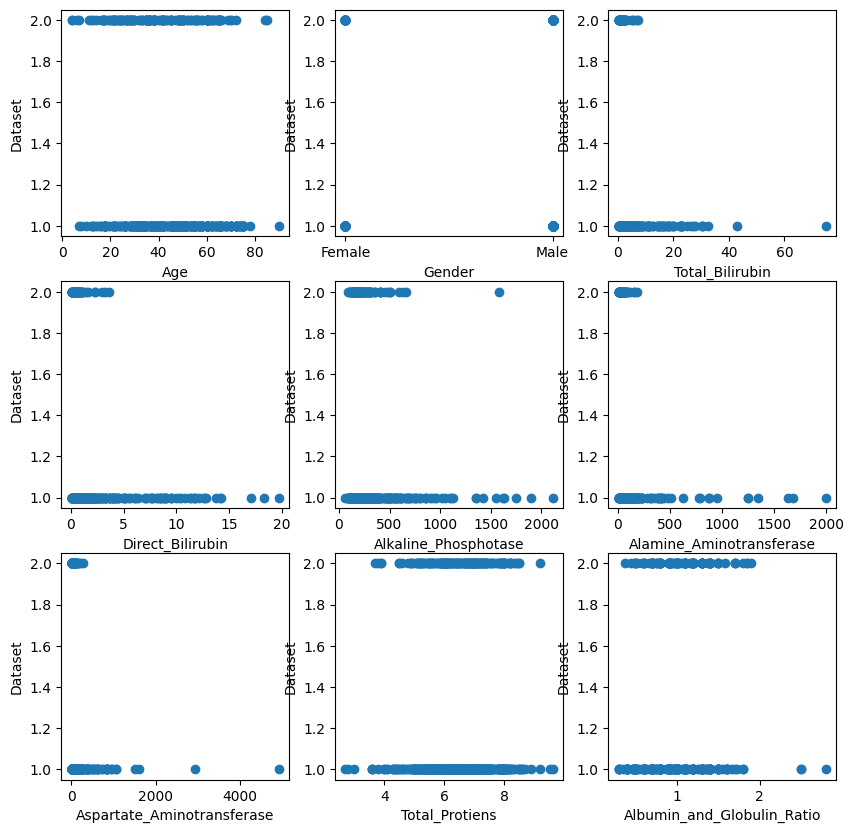

In [182]:
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
plt.scatter(data['Age'], data['Dataset'])
plt.ylabel('Dataset')
plt.xlabel('Age')


plt.subplot(3,3,2)
plt.scatter(data['Gender'], data['Dataset'],)
plt.ylabel('Dataset')
plt.xlabel('Gender')

plt.subplot(3,3,3)
plt.scatter(data['Total_Bilirubin'], data['Dataset'],)
plt.ylabel('Dataset')
plt.xlabel('Total_Bilirubin')


plt.subplot(3,3,4)
plt.scatter(data['Direct_Bilirubin'], data['Dataset'],)
plt.ylabel('Dataset')
plt.xlabel('Direct_Bilirubin')

plt.subplot(3,3,5)
plt.scatter(data['Alkaline_Phosphotase'], data['Dataset'],)
plt.ylabel('Dataset')
plt.xlabel('Alkaline_Phosphotase')

plt.subplot(3,3,6)
plt.scatter(data['Alamine_Aminotransferase'], data['Dataset'],)
plt.ylabel('Dataset')
plt.xlabel('Alamine_Aminotransferase')


plt.subplot(3,3,7)
plt.scatter(data['Aspartate_Aminotransferase'], data['Dataset'],)
plt.ylabel('Dataset')
plt.xlabel('Aspartate_Aminotransferase')

plt.subplot(3,3,8)
plt.scatter(data['Total_Protiens'], data['Dataset'],)
plt.ylabel('Dataset')
plt.xlabel('Total_Protiens')

plt.subplot(3,3,9)
plt.scatter(data['Albumin_and_Globulin_Ratio'], data['Dataset'])
plt.ylabel('Dataset')
plt.xlabel('Albumin_and_Globulin_Ratio')

No of Males: 441
No of Females: 142


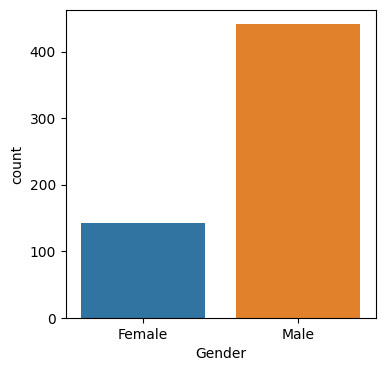

In [183]:
# Counting patients who are Male and who are Female
plt.figure(figsize=(4,4))
sns.countplot(data=data, x = 'Gender', label='Count')
m,f=data['Gender'].value_counts()
print("No of Males:",m)
print("No of Females:",f)

In [184]:
#we have gender column as categorical
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [185]:
data['Gender'] = le.fit_transform(data['Gender'])
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [186]:
#from sklearn.preprocessing import StandardScaler
#SS=StandardScaler()

In [187]:
#data_scaled=SS.fit_transform(data)
#data_scaled

In [188]:
#data=pd.DataFrame(data_scaled,columns=["Age","Gender","Total_Bilirubin","Direct_Bilirubin","Alkaline_Phosphotase","Alamine_Aminotransferase","Aspartate_Aminotransferase","Total_Protiens","Albumin","Albumin_and_Globulin_Ratio","Dataset"])

In [189]:
#train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data.drop("Dataset",axis="columns"),data.Dataset,test_size=0.2,random_state=10)

In [190]:
x_train.shape

(466, 10)

In [191]:
x_test.shape

(117, 10)

In [192]:
#model_building
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression()

In [193]:
model_lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [194]:
#logisticregression score on  test set
model_lr.score(x_test,y_test)

0.6837606837606838

In [195]:
predict_lr=model_lr.predict(x_test)

In [196]:
#unig svm
from sklearn.svm import SVC
model_svm=SVC()

In [197]:
model_svm.fit(x_train,y_train)

SVC()

In [198]:
model_svm.score(x_test,y_test)

0.7094017094017094

In [199]:
predict_svm=model_svm.predict(x_test)

In [200]:
#random Forest
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier()

In [201]:
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [202]:
model_rf.score(x_test,y_test)

0.7008547008547008

In [203]:
predict_rf=model_rf.predict(x_test)

In [204]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier()

In [205]:
model_knn.fit(x_train,y_train)


KNeighborsClassifier()

In [206]:
predict_knn=model_knn.predict(x_test)

In [207]:
model_knn.score(x_test,y_test)

0.6581196581196581

In [208]:
#from above four  algorithms svm  predicting better


In [209]:
#model evoluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Text(50.722222222222214, 0.5, 'predicted')

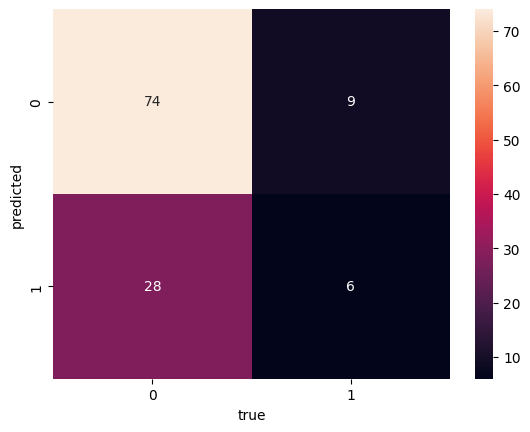

In [210]:
cm_lr=confusion_matrix(y_test,predict_lr)
sns.heatmap(cm_lr,annot=True)
plt.xlabel("true")
plt.ylabel('predicted')

In [211]:
accuracy_lr=accuracy_score(y_test,predict_lr)
accuracy_lr

0.6837606837606838

Text(50.722222222222214, 0.5, 'predicted')

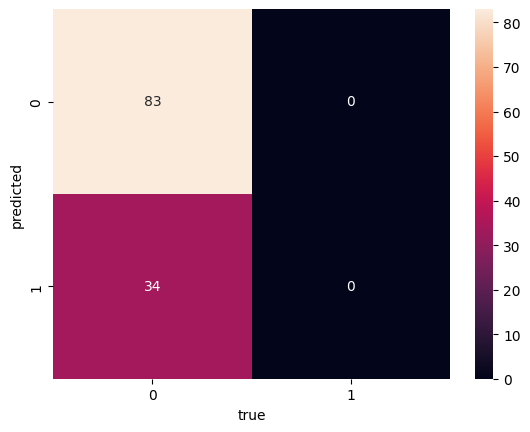

In [212]:
cm_svm=confusion_matrix(y_test,predict_svm)
sns.heatmap(cm_svm,annot=True)
plt.xlabel("true")
plt.ylabel('predicted')

In [213]:
accuracy_svm=accuracy_score(y_test,predict_svm)
accuracy_svm

0.7094017094017094

Text(50.722222222222214, 0.5, 'predicted')

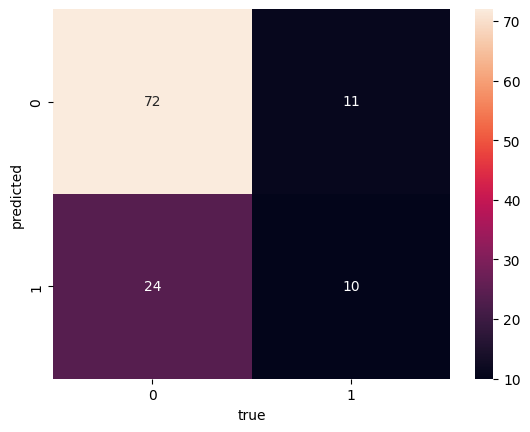

In [214]:
cm_rf=confusion_matrix(y_test,predict_rf)
sns.heatmap(cm_rf,annot=True)
plt.xlabel("true")
plt.ylabel('predicted')

In [215]:
accuracy_rf=accuracy_score(y_test,predict_rf)
accuracy_rf

0.7008547008547008

Text(50.722222222222214, 0.5, 'predicted')

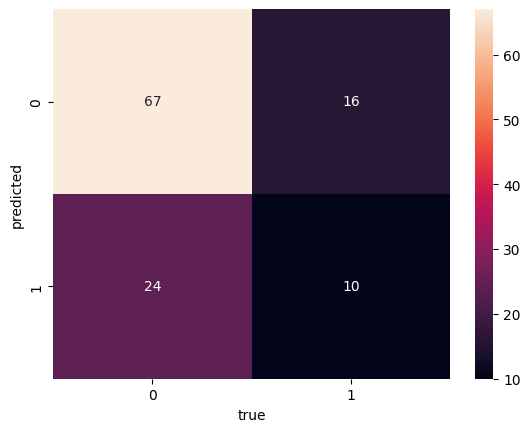

In [216]:
cm_knn=confusion_matrix(y_test,predict_knn)
sns.heatmap(cm_knn,annot=True)
plt.xlabel("true")
plt.ylabel('predicted')

In [217]:
accuracy_knn=accuracy_score(y_test,predict_knn)
accuracy_knn

0.6581196581196581

In [218]:
print("Logistic Regression  Algorithm accuracy score : {value:.2f} %".format(value=accuracy_lr*100))
print("Support Vector Machine Algorithm accuracy score : {value:.2f} %".format(value=accuracy_svm*100))
print("Random Forest Algorithm accuracy score : {value:.2f} %".format(value=accuracy_rf*100))
print("K-Nearest Neighbors Algorithm accuracy score : {value:.2f} %".format(value=accuracy_knn*100))

Logistic Regression  Algorithm accuracy score : 68.38 %
Support Vector Machine Algorithm accuracy score : 70.94 %
Random Forest Algorithm accuracy score : 70.09 %
K-Nearest Neighbors Algorithm accuracy score : 65.81 %


In [219]:
# saving the model
import pickle
pickle.dump(model_svm, open('LIVER_ANALYSIS.pkl','wb'))